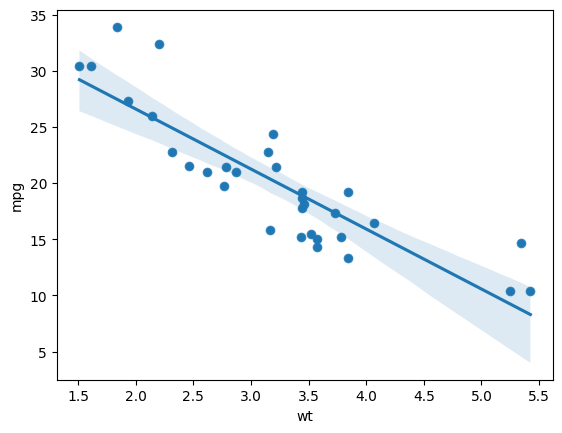

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

X_list = cars.wt.values
y_list = cars.mpg.values

X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)

X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [2]:
# creating a class for the model in order to use in a comfortabe way 
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)

Esto es importante, LinearRegressionTorch es una subclase de nn.Module (como una herencia). 
la línea super(LinearRegressionTorch, self).__init__() se utiliza para asegurar que la instancia de la clase base se inicializa 
antes que la clase derivada. 
Es por esta relación base-derivada que en el siguiente code snippet se puede instanciar el método parameters que le pertenece a la clase base 

Epoch 0, Loss: 554.1739501953125
Epoch 100, Loss: 66.57781982421875
Epoch 200, Loss: 40.178611755371094
Epoch 300, Loss: 25.820110321044922
Epoch 400, Loss: 18.01051902770996
Epoch 500, Loss: 13.76288890838623
Epoch 600, Loss: 11.452596664428711
Epoch 700, Loss: 10.196017265319824
Epoch 800, Loss: 9.512567520141602
Epoch 900, Loss: 9.14084243774414
Epoch 1000, Loss: 8.938663482666016
Epoch 1100, Loss: 8.828700065612793
Epoch 1200, Loss: 8.768888473510742
Epoch 1300, Loss: 8.73635482788086
Epoch 1400, Loss: 8.71866226196289
Epoch 1500, Loss: 8.709039688110352
Epoch 1600, Loss: 8.703804969787598
Epoch 1700, Loss: 8.700957298278809
Epoch 1800, Loss: 8.699408531188965
Epoch 1900, Loss: 8.698566436767578
Epoch 2000, Loss: 8.698108673095703
Epoch 2100, Loss: 8.697859764099121
Epoch 2200, Loss: 8.697723388671875
Epoch 2300, Loss: 8.697649002075195
Epoch 2400, Loss: 8.697610855102539
Epoch 2500, Loss: 8.697587966918945
Epoch 2600, Loss: 8.697575569152832
Epoch 2700, Loss: 8.697568893432617
Epo

<Axes: >

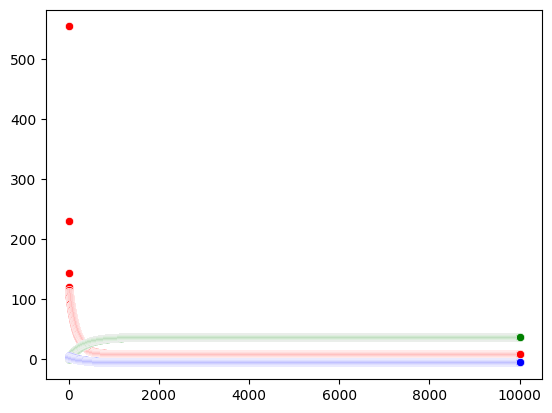

In [3]:
# hyperparameter definition
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses, slope, bias = [], [], []
NUM_EPOCHS = 10000
loss_fun = nn.MSELoss()

for epoch in range(NUM_EPOCHS):
    
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass
    y_pred = model.forward(X)

    # calculate loss
    loss = loss_fun(y_pred, y_true)
    loss.backward()

    # update parameters
    optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])

    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        # store loss
        print(f"Epoch {epoch}, Loss: {loss.data}")

print(len(range(NUM_EPOCHS)))
print(len(losses))

sns.scatterplot(x=range(NUM_EPOCHS), y=losses, color='red') # visualize model training
sns.scatterplot(x=range(NUM_EPOCHS), y=bias, color='green') # visualise the bias development
sns.scatterplot(x=range(NUM_EPOCHS), y=slope, color='blue') # visualise the slope development


<Axes: >

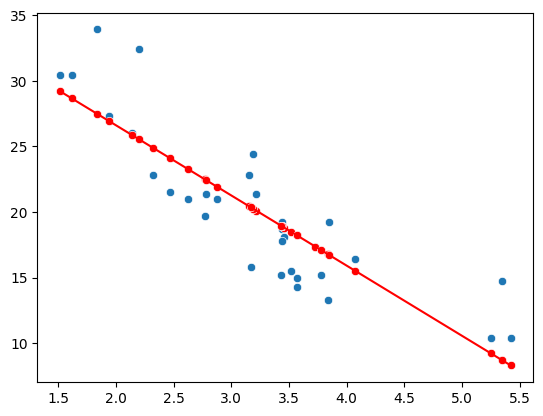

In [4]:
# check the result 
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.scatterplot(x=X_list, y=y_pred, color='red')
sns.lineplot(x=X_list, y=y_pred, color='red')